# Importing the librairies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
score = pd.read_csv('/content/drive/MyDrive/student_scores.csv')

In [ ]:
score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the data

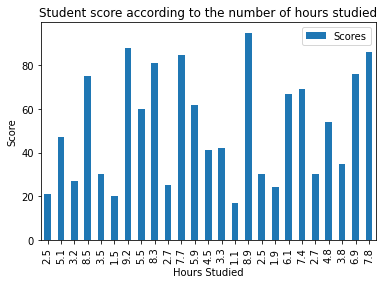

In [ ]:
score.plot(x ='Hours', y='Scores', kind = 'bar')
plt.title('Student score according to the number of hours studied')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

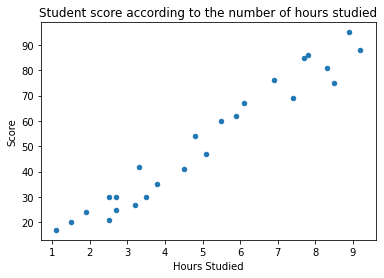

In [ ]:
score.plot(x ='Hours', y='Scores', kind = 'scatter')
plt.title('Student score according to the number of hours studied')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

# Train-Test-Split

In [ ]:

y= score.Scores
X= score.drop(['Scores'] ,axis=1 )

In [ ]:
X_train ,X_test ,y_train , y_test = train_test_split(X, y ,train_size=0.8 , test_size = 0.2)

# Training the model 
I choose to use Random Forest since it has much better predictive accuracy than a single decision tree and it works with default parameters

In [ ]:
forest_model =RandomForestRegressor(random_state=1)

In [ ]:
forest_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
pred = forest_model.predict(X_test)

# Using differents metrics 

In [ ]:
print("Mean absolute error : ")
print(mean_absolute_error(y_test, pred))

Mean absolute error : 
9.665500000000002


In [ ]:
print("Mean absolute error : ")
print(mean_squared_error(y_test, pred, squared=False))

Mean absolute error : 
11.478602756868975


# Testing the model obtained

In [ ]:
prediction = forest_model.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})  

In [ ]:
df

,Actual,Predicted
5,20,19.2625
15,95,77.2400
6,88,77.2400
22,35,30.2200
13,42,27.7100


In [ ]:
dff = pd.DataFrame({'hours': 9.25},index=(0,1))  
hours=[20,9.25]
p =forest_model.predict(dff)[0]


In [ ]:
print("for 9.25 hours studied the student may likely achieve ", p)

for 9.25 hours studied the student may likely achieve  77.24
